[Reference](https://medium.com/@pusalavijaykumar015/generate-your-own-dataset-using-python-faker-lib-4b31527cbfd1)

In [2]:
!pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.0 MB/s 


In [9]:
from faker import Faker
import pandas as pd
import random

In [4]:
fake=Faker("en_US")
emp_data = [(_+1,fake.first_name(),fake.last_name(),fake.unique.phone_number(),fake.state()) for _ in range(10000)]
print(emp_data)

[(1, 'Pamela', 'Howard', '(359)272-5743x16269', 'Rhode Island'), (2, 'Sharon', 'Rios', '656-564-9063x9158', 'Michigan'), (3, 'James', 'Johnson', '001-220-395-5075x53428', 'North Carolina'), (4, 'Maria', 'Meyer', '+1-643-995-0546x4446', 'Virginia'), (5, 'Christopher', 'Hood', '999-080-6143x80194', 'Alabama'), (6, 'Theresa', 'Johnson', '001-260-714-3673x934', 'Mississippi'), (7, 'Jeffrey', 'Harris', '001-069-153-7092x0339', 'New York'), (8, 'Roger', 'Baker', '673-402-5650x99123', 'South Carolina'), (9, 'Tracy', 'Marshall', '746-093-0106', 'Mississippi'), (10, 'William', 'Delgado', '(566)889-3882x619', 'New Hampshire'), (11, 'Randall', 'Ewing', '483.923.0149x3275', 'Oregon'), (12, 'Gina', 'Romero', '001-024-834-4720x97951', 'Wisconsin'), (13, 'Bianca', 'Ball', '001-198-564-2441x839', 'Nebraska'), (14, 'Jennifer', 'Daniels', '8464126346', 'Tennessee'), (15, 'Brenda', 'Cox', '379-224-8880x4262', 'Oregon'), (16, 'Karen', 'Mccall', '754-648-8771x77435', 'Maine'), (17, 'Ashley', 'Reeves', '+1-

In [5]:
emp_df = pd.DataFrame(emp_data,columns=["emp_id","first_name","last_name","phone","state"])
print(emp_df)

      emp_id   first_name last_name                   phone           state
0          1       Pamela    Howard     (359)272-5743x16269    Rhode Island
1          2       Sharon      Rios       656-564-9063x9158        Michigan
2          3        James   Johnson  001-220-395-5075x53428  North Carolina
3          4        Maria     Meyer    +1-643-995-0546x4446        Virginia
4          5  Christopher      Hood      999-080-6143x80194         Alabama
...      ...          ...       ...                     ...             ...
9995    9996         Mary      Reed       890-119-6280x8276        Illinois
9996    9997       Ashley    Carter            978-877-1118       Minnesota
9997    9998      Heather   Miranda       847-536-5525x5293  North Carolina
9998    9999       Robert    Walker      667.510.3147x28771          Kansas
9999   10000       Thomas      Hall     (942)378-8233x36922            Utah

[10000 rows x 5 columns]


In [6]:
if emp_df.duplicated(subset="phone").sum()==0:
   print ("No duplites in phone column")
else:
   print ("Has duplicates in phone column")

No duplites in phone column


In [7]:
dept_data = [(10,"Finance"),(20,"IT"),(30,"Marketing"),(40,"Sales"), (50,"Production"), (60,"Quality")]
dept_df = pd.DataFrame(dept_data,columns=["dept_id","dept_name"])

In [10]:
import numpy as np
np.random.seed(10)
salary = [int(_//100)*100 for _ in np.random.normal(loc=90000, scale=8000, size=10000)]
salary_data = [(_,random.choice(dept_df.dept_id),salary[_-1]) for _ in emp_df.emp_id]
salary_df = pd.DataFrame(salary_data,columns=["emp_id","dept_id","salary"])

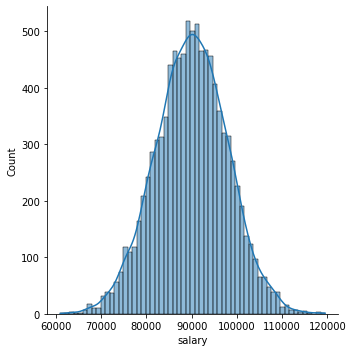

In [11]:
import seaborn as sns
sns.displot(salary_df.salary,kde=True)